# Logistic Regression
This part we’re going to switch our objective from predicting a continuous value (regression) to classifying a result into two or more discrete buckets (classification) and apply it to a student admissions problem. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores using a somewhat confusingly-named technique called logistic regression.

## Logistic Regression
logistic regression is actually a classification algorithm.

In particular, logistic regression uses a <a href='https://baike.baidu.com/item/Sigmoid%E5%87%BD%E6%95%B0/7981407?fr=aladdin'>***sigmoid***</a> or “logit” activation function instead of the continuous output in linear regression (hence the name).

### Getting data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [5]:
path = os.getcwd() + '/pythonMachineLearning/MLExercises/data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


 Our prediction target is the “Admitted” label, which is binary-valued.
 
 A value of 1 means the student was admitted and a value of 0 means the student was not admitted. Let’s see this graphically with a scatter plot of the two scores and use color coding to visualize if the example is positive or negative.

Text(0,0.5,'Exam 2 Score')

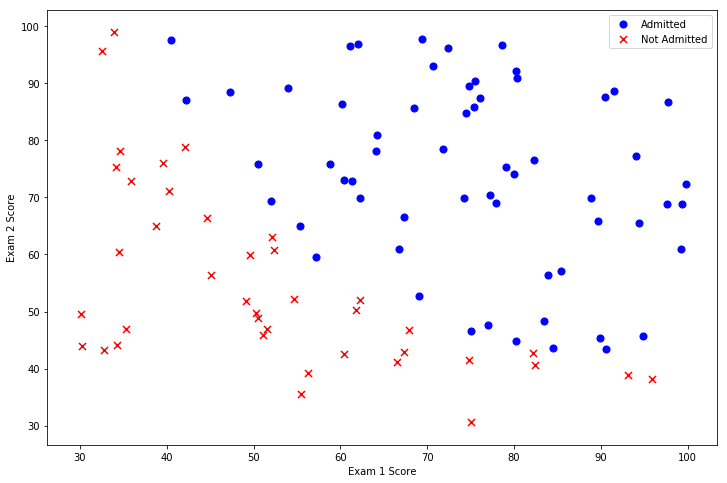

In [6]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

From this plot we can see that there’s a nearly linear decision boundary. It curves a bit so we can’t classify all of the examples correctly using a straight line, but we should be able to get pretty close. Now we need to implement logistic regression so we can train a model to find the optimal decision boundary and make class predictions. The first step is to implement the sigmoid function.

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

This function is the “activation” function for the output of logistic regression. It converts a continuous input into a value between zero and one. This value can be interpreted as the class probability, or the likelihood that the input example should be classified positively. Using this probability along with a threshold value, we can obtain a discrete label prediction. It helps to visualize the function’s output to see what it’s really doing.

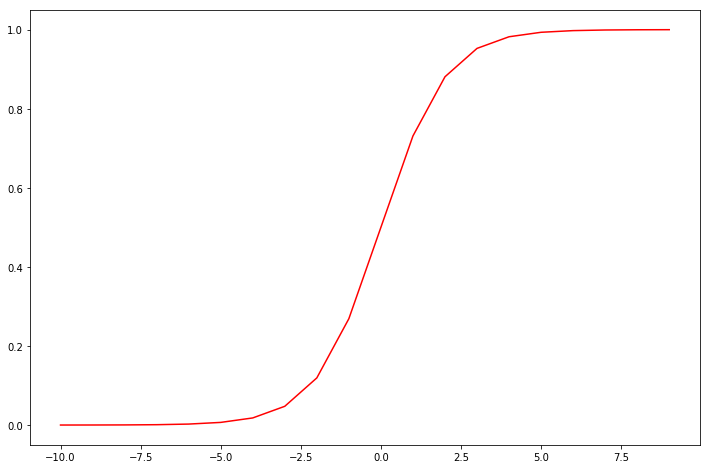

In [8]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')

Our next step is to write the cost function. Remember that the cost function evaluates the performance of the model on the training data given a set of model parameters. Here’s the cost function for logistic regression.

In [10]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    return np.sum(first - second) / (len(X))